## Notebook description/goals


In [85]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [86]:
import sys
sys.path.append('/data/tjarniko/MEOPAR/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/VIZ')
import mocsy
import VIZ_plots as VP

import time
import numpy as np
import matplotlib.pyplot as plt
from oct2py import octave
import seawater as sw
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import reload
plt.style.use('seaborn-white')
import netCDF4 as nc
import numpy as np
import cmocean as cm

""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline

In [87]:
reload(VP)

<module 'VIZ_plots' from '/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/VIZ/VIZ_plots.py'>

## Printouts of diagnostics from point 250, 250 at timestep 0 

In [88]:
tda = 'a31_6'
carp = nc.Dataset('/data/tjarniko/results/' + tda + '/SalishSea_1ts_20171026_20171026_ptrc_T.nc')
#print(td)
grid = nc.Dataset('/data/tjarniko/results/' + tda + '/SalishSea_1ts_20171026_20171026_grid_T.nc')
#print(tdg)

temp = grid.variables['votemper'][:]
sal = grid.variables['vosaline'][:]
#print('temp: ', temp[0,0,250,250])
#print('sal: ', sal[0,0,250,250])

In [89]:
td = carp

f_ph = td.variables['f_ph'][:]
f_pco2w = td.variables['f_pco2w'][:]
wind_mag = td.variables['wind_mag'][:]
f_omarg = td.variables['f_omarg'][:]
f_co2flux = td.variables['f_co2flux'][:]
f_dpco2 = td.variables['f_dpco2'][:]
dar = [f_ph, f_pco2w, f_omarg, f_co2flux, wind_mag, f_dpco2]

darn = ['f_ph', 'f_pco2w', 'f_omarg', 'f_co2flux', 'wind_mag', 'f_dpco2']

for i in range(0,len(dar)):
    print(darn[i])
    print(dar[i][0,250,250])

f_ph
7.74114
f_pco2w
803.021
f_omarg
0.996381
f_co2flux
-2.96733e-05
wind_mag
1.76449
f_dpco2
396.842


          kwco2 = kw660 * (660./schmidtco2)**0.5

    !     Surface K0 [(mol/kg) / atm] at T, S of surface water
          CALL surface_K0(temp, sal, N, & ! INPUT
          K0)                             ! OUTPUT

    !     "Atmospheric" [CO2*], air-sea CO2 flux, sfc DIC rate of change, & Delta pCO2
    !     all "lifted" from the gasx.f90 function of MOCSY
          co2starair = K0 * fco2atm * 1.0e-6_wp * rhoSW ! Equil. [CO2*] for atm CO2 at Patm & sfc-water T,S [mol/m3]
          co2star    = co2                              ! Oceanic [CO2*] in [mol/m3] from vars.f90
          co2flux    = kwco2 * (co2starair - co2star)   ! Air-sea CO2 flux [mol/(m2 * s)]
    !     co2ex      = co2flux / dz1                    ! Change in sfc DIC due to gas exchange [mol/[m3 * s)]
          dpco2      = pco2 - pco2atm                   ! Delta pCO2 (oceanic - atmospheric pCO2) [uatm]

In [90]:
def flux_maps(carp,grid, ddmmmyy, rdir,humandate, dss_sig):
    
    twind = carp.variables['wind_mag'][0,:,:]
    ttemp = grid.variables['votemper'][0,0,:,:]
    tdic = carp.variables['dissolved_inorganic_carbon'][0,0,:,:]
    tpco2 = carp.variables['f_pco2w'][0,:,:]
    co2flux = carp.variables['f_co2flux'][0,:,:] * -1
    dpco2 = carp.variables['f_dpco2'][0,:,:]
    
    surf_dat = [twind, ttemp, tdic, tpco2, co2flux, dpco2]
    
    
    vmins = [0,0,1800,0,-1e-4,-500]
    vmaxs = [10,30,2200,1000,1e-4,500]
    msk = [0,0,0,0,0,0]
    cl = ['wind m/s', 'temp (deg C)', 'DIC umol', 'uatm', 'co2flux', 'dpco2']
    t_cmap = [cm.cm.tempo, cm.cm.thermal, cm.cm.matter, cm.cm.matter, cm.cm.curl, cm.cm.curl]

    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = \
    plt.subplots(figsize=(20, 27) , nrows=2, ncols=3)

    viz_tools.set_aspect(ax1)
    viz_tools.set_aspect(ax2)
    viz_tools.set_aspect(ax3)
    viz_tools.set_aspect(ax4)
    viz_tools.set_aspect(ax5)
    viz_tools.set_aspect(ax6)

    i = 0
    tplt0 = surf_dat[i]
    tplt = np.ma.masked_values(tplt0,msk[i])
    tcmap = t_cmap[i]
    mesh = ax1.pcolormesh(tplt, cmap=tcmap, vmin=vmins[i], vmax=vmaxs[i])
    cbar = fig.colorbar(mesh, ax=ax1)
    cbar.set_label(cl[i], fontsize = 20 )

    i = 1
    tplt0 = surf_dat[i]
    tplt = np.ma.masked_values(tplt0,msk[i])
    tcmap = t_cmap[i]
    mesh = ax2.pcolormesh(tplt, cmap=tcmap, vmin=vmins[i], vmax=vmaxs[i])
    cbar = fig.colorbar(mesh, ax=ax2)
    cbar.set_label(cl[i], fontsize = 20 )

    i = 2
    tplt0 = surf_dat[i]
    tplt = np.ma.masked_values(tplt0,msk[i])
    tcmap = t_cmap[i]
    mesh = ax3.pcolormesh(tplt, cmap=tcmap, vmin=vmins[i], vmax=vmaxs[i])
    cbar = fig.colorbar(mesh, ax=ax3)
    cbar.set_label(cl[i], fontsize = 20 )

    i = 3
    tplt0 = surf_dat[i]
    tplt = np.ma.masked_values(tplt0,msk[i])
    tcmap = t_cmap[i]
    mesh = ax4.pcolormesh(tplt, cmap=tcmap, vmin=vmins[i], vmax=vmaxs[i])
    cbar = fig.colorbar(mesh, ax=ax4)
    cbar.set_label(cl[i], fontsize = 20 )

    i = 4
    tplt0 = surf_dat[i]
    tplt = np.ma.masked_values(tplt0,msk[i])
    tcmap = t_cmap[i]
    mesh = ax5.pcolormesh(tplt, cmap=tcmap, vmin=vmins[i], vmax=vmaxs[i])
    cbar = fig.colorbar(mesh, ax=ax5)
    cbar.set_label(cl[i], fontsize = 20 )

    i = 5
    tplt0 = surf_dat[i]
    tplt = np.ma.masked_values(tplt0,msk[i])
    tcmap = t_cmap[i]
    mesh = ax6.pcolormesh(tplt, cmap=tcmap, vmin=vmins[i], vmax=vmaxs[i])
    cbar = fig.colorbar(mesh, ax=ax6)
    cbar.set_label(cl[i], fontsize = 20 )



    #tcmap.set_bad('white')
    st = 'Salish Sea Carbonate Chemistry Flux Map, ' + humandate
    plt.suptitle(st,fontsize=20)
    
    fname = rdir + f'{ddmmmyy}_map_' + dss_sig +'.png'

    plt.show()
    #fig.savefig(fname)
    #plt.close()

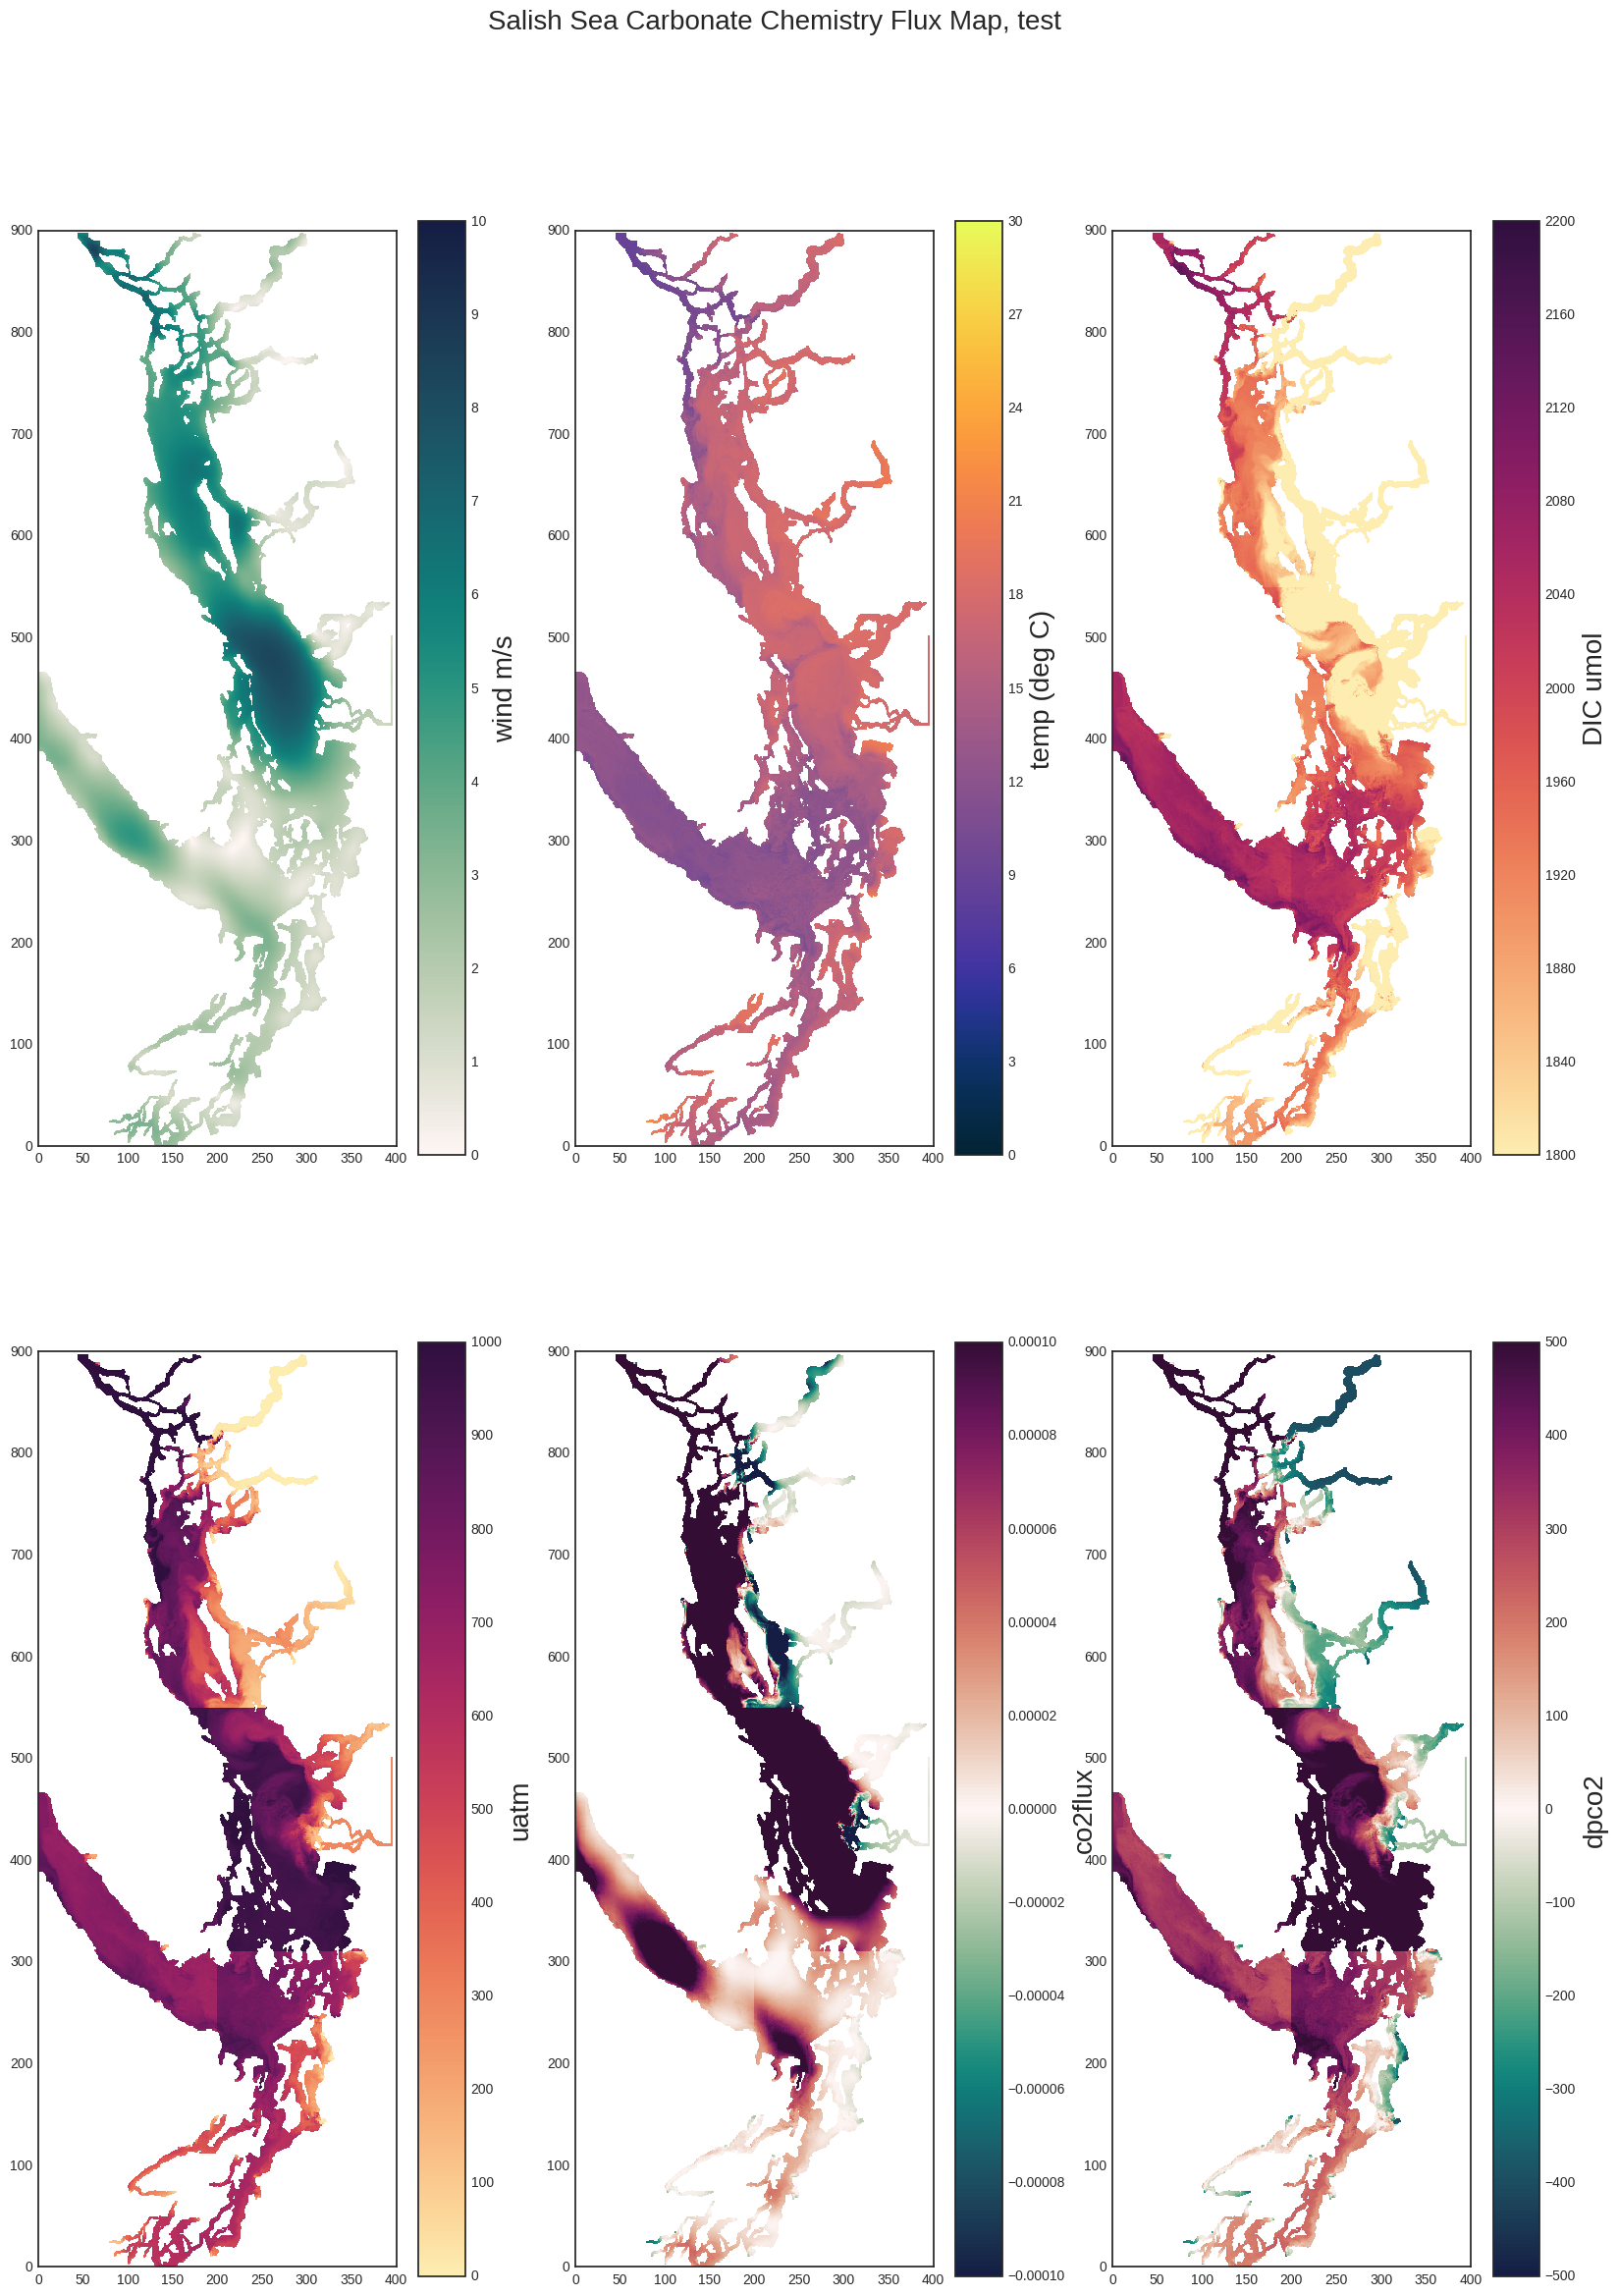

In [91]:
flux_maps(carp,grid, '000', './','test', 'dss_sig')